# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
Avatar: The Last Airbender,\r\n\r\n\r\n \t\t\t[mysteri...,AVATAR: THE LAST AIRBENDER – S01E01 – AANG
Curb Your Enthusiasm,\r\n\r\n\r\n \t\t\t- That's...,"CURB YOUR ENTHUSIASM – S12E03 – VERTICAL DROP,..."
Death and Other Details,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,DEATH AND OTHER DETAILS – S01E07 – MEMORABLE
Euphoria,\r\n\r\n\r\n \t\t\t1 - (HEA...,EUPHORIA-PILOT
Game Of Thrones,\r\n\r\n\r\n \t\t\tA girl w...,GAME-OF-THRONES-BATTLE-OF-BASTARDS
Last Week Tonight with John Oliver,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,SUPREME COURT CORRUPTION: LAST WEEK TONIGHT WI...
Peaky Blinders,\r\n\r\n\r\n \t\t\tI just g...,PEAKY-BLINDERS-S4-E6-THE-COMPANY
Resident Alien,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,RESIDENT-ALIEN-S3-E2-THE-UPPER-HAND
The Boys,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,THE-BOYS-DIRTY-BUSINESS
The Good Doctor,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,"THE GOOD DOCTOR – S07E01 – BABY, BABY, BABY"


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
Avatar: The Last Airbender,\r\n\r\n\r\n \t\t\t[mysteri...,AVATAR: THE LAST AIRBENDER – S01E01 – AANG,0.129218,0.562664
Curb Your Enthusiasm,\r\n\r\n\r\n \t\t\t- That's...,"CURB YOUR ENTHUSIASM – S12E03 – VERTICAL DROP,...",0.104101,0.567524
Death and Other Details,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,DEATH AND OTHER DETAILS – S01E07 – MEMORABLE,0.030105,0.525050
Euphoria,\r\n\r\n\r\n \t\t\t1 - (HEA...,EUPHORIA-PILOT,0.018116,0.576698
Game Of Thrones,\r\n\r\n\r\n \t\t\tA girl w...,GAME-OF-THRONES-BATTLE-OF-BASTARDS,0.144227,0.531924
Last Week Tonight with John Oliver,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,SUPREME COURT CORRUPTION: LAST WEEK TONIGHT WI...,0.125785,0.493299
Peaky Blinders,\r\n\r\n\r\n \t\t\tI just g...,PEAKY-BLINDERS-S4-E6-THE-COMPANY,-0.011577,0.482038
Resident Alien,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,RESIDENT-ALIEN-S3-E2-THE-UPPER-HAND,0.062396,0.550894
The Boys,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,THE-BOYS-DIRTY-BUSINESS,0.006105,0.540722
The Good Doctor,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,"THE GOOD DOCTOR – S07E01 – BABY, BABY, BABY",0.137060,0.509928


<ipython-input-9-5d28742e72c9>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)


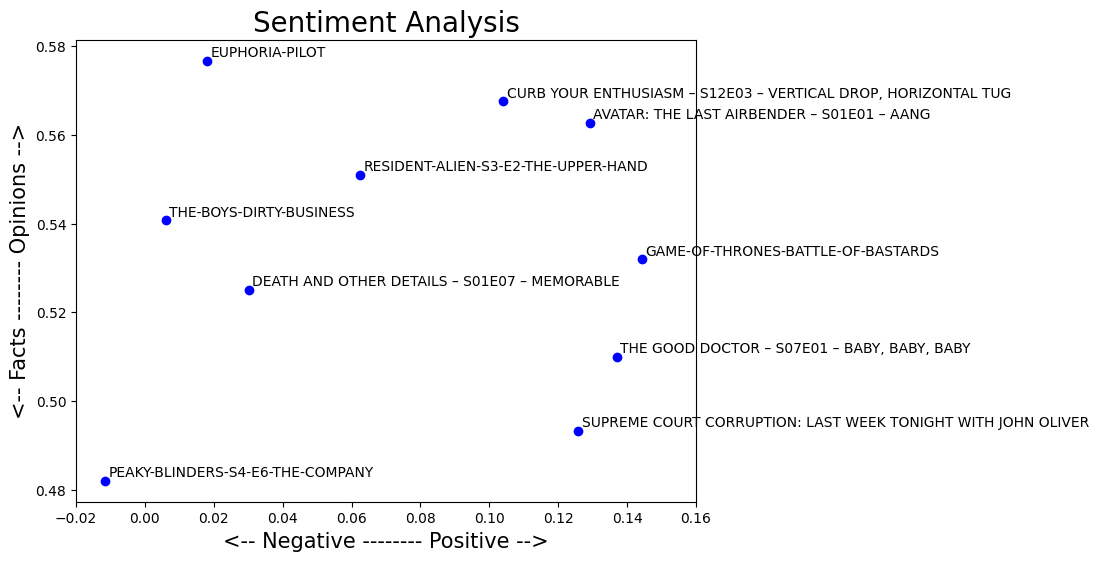

In [9]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 6] # rcParams used to set the default values for the plot

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.02, .16)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [10]:
# Classify all TV Shows according to Polarity and Subjectivity.

data['polarity_class'] = data['polarity'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < 0 else 'neutral'))
data['subjectivity_class'] = data['subjectivity'].apply(lambda x: 'subjective' if x > 0.5 else 'objective')

data

,transcript,full_name,polarity,subjectivity,polarity_class,subjectivity_class
Avatar: The Last Airbender,\r\n\r\n\r\n \t\t\t[mysteri...,AVATAR: THE LAST AIRBENDER – S01E01 – AANG,0.129218,0.562664,positive,subjective
Curb Your Enthusiasm,\r\n\r\n\r\n \t\t\t- That's...,"CURB YOUR ENTHUSIASM – S12E03 – VERTICAL DROP,...",0.104101,0.567524,positive,subjective
Death and Other Details,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,DEATH AND OTHER DETAILS – S01E07 – MEMORABLE,0.030105,0.525050,neutral,subjective
Euphoria,\r\n\r\n\r\n \t\t\t1 - (HEA...,EUPHORIA-PILOT,0.018116,0.576698,neutral,subjective
Game Of Thrones,\r\n\r\n\r\n \t\t\tA girl w...,GAME-OF-THRONES-BATTLE-OF-BASTARDS,0.144227,0.531924,positive,subjective
Last Week Tonight with John Oliver,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,SUPREME COURT CORRUPTION: LAST WEEK TONIGHT WI...,0.125785,0.493299,positive,objective
Peaky Blinders,\r\n\r\n\r\n \t\t\tI just g...,PEAKY-BLINDERS-S4-E6-THE-COMPANY,-0.011577,0.482038,negative,objective
Resident Alien,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,RESIDENT-ALIEN-S3-E2-THE-UPPER-HAND,0.062396,0.550894,positive,subjective
The Boys,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,THE-BOYS-DIRTY-BUSINESS,0.006105,0.540722,neutral,subjective
The Good Doctor,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,"THE GOOD DOCTOR – S07E01 – BABY, BABY, BABY",0.137060,0.509928,positive,subjective


## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [11]:
# Split each routine into 50 parts
import numpy as np
import math

def split_text(text, n=50):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [12]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity,polarity_class,subjectivity_class
Avatar: The Last Airbender,\r\n\r\n\r\n \t\t\t[mysteri...,AVATAR: THE LAST AIRBENDER – S01E01 – AANG,0.129218,0.562664,positive,subjective
Curb Your Enthusiasm,\r\n\r\n\r\n \t\t\t- That's...,"CURB YOUR ENTHUSIASM – S12E03 – VERTICAL DROP,...",0.104101,0.567524,positive,subjective
Death and Other Details,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,DEATH AND OTHER DETAILS – S01E07 – MEMORABLE,0.030105,0.525050,neutral,subjective
Euphoria,\r\n\r\n\r\n \t\t\t1 - (HEA...,EUPHORIA-PILOT,0.018116,0.576698,neutral,subjective
Game Of Thrones,\r\n\r\n\r\n \t\t\tA girl w...,GAME-OF-THRONES-BATTLE-OF-BASTARDS,0.144227,0.531924,positive,subjective
Last Week Tonight with John Oliver,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,SUPREME COURT CORRUPTION: LAST WEEK TONIGHT WI...,0.125785,0.493299,positive,objective
Peaky Blinders,\r\n\r\n\r\n \t\t\tI just g...,PEAKY-BLINDERS-S4-E6-THE-COMPANY,-0.011577,0.482038,negative,objective
Resident Alien,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,RESIDENT-ALIEN-S3-E2-THE-UPPER-HAND,0.062396,0.550894,positive,subjective
The Boys,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,THE-BOYS-DIRTY-BUSINESS,0.006105,0.540722,neutral,subjective
The Good Doctor,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,"THE GOOD DOCTOR – S07E01 – BABY, BABY, BABY",0.137060,0.509928,positive,subjective


In [14]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    # condition to check for if t is empty
    if t != '':
       split = split_text(t,50)
       list_pieces.append(split)
list_pieces

[["\r\n\r\n\r\n                    \t\t\t[mysterious music playing]\n\t\t\t[bell clanging]\n\t\t\t[action music playing]\n\t\t\t[guard] There he is! Cut him off!\n\t\t\t[guard 2] Stop in the name of\n\t\t\t[guard 3] Right there!\n\t\t\t[birds squawking]\n\t\t\t- [guard] Go!\n\t\t\t- [guard 2] Go!\n\t\t\t[guard shouts]\n\t\t\t[guard] He's over there! Get him!\n\t\t\t[birds squawk]\n\t\t\t- [guard] There he is.\n\t\t\t- [guard 2] Don't let him get away!\n\t\t\t[men clamoring]\n\t\t\t- [grunts]\n\t\t\t- [birds chirping]\n\t\t\t[guard] After him!\n\t\t\t[bird cooing]\n\t\t\tStop!\n\t\t\t[action music swells]\n\t\t\t[guards grunting]\n\t\t\t[yells]\n\t\t\t[guard",
  " grunts]\n\t\t\tAn Earthbender.\n\t\t\t[man] Hurry!\n\t\t\t[bird clucks]\n\t\t\t[grunts]\n\t\t\t- [birds squawk]\n\t\t\t- [man grunts]\n\t\t\t[grunts]\n\t\t\t[grunts]\n\t\t\t[grunts]\n\t\t\t[man yells indistinctly]\n\t\t\t[man] Come on!\n\t\t\t- [birds squawks]\n\t\t\t- Now! Now!\n\t\t\t[guard] He went that way!\n\t\t\t- [grunt

In [15]:
# The list has 10 elements, one for each transcript
len(list_pieces)

10

In [16]:
# Each transcript has been split into 50 pieces of text
len(list_pieces[0])

50

In [17]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.3140625,
  -0.21666666666666665,
  0.06874999999999999,
  0.10416666666666666,
  -0.24675324675324675,
  0.2140625,
  0.32999999999999996,
  0.3783482142857142,
  0.25,
  -0.225,
  0.14629629629629629,
  0.27346938775510204,
  0.2162202380952381,
  0.43333333333333335,
  0.041666666666666664,
  0.17633928571428573,
  0.21583333333333332,
  0.09365079365079362,
  -0.015416666666666657,
  0.22142857142857142,
  0.45839285714285716,
  0.20803571428571427,
  -0.07291666666666666,
  0.19624999999999998,
  -0.11333333333333333,
  0.16712962962962963,
  -0.02083333333333333,
  -0.14375,
  -0.07417027417027418,
  0.29375,
  0.15499999999999997,
  0.11190476190476192,
  0.004475308641975305,
  0.178030303030303,
  -0.04044784580498866,
  0.14444444444444446,
  0.3071428571428571,
  0.16666666666666666,
  -0.006373106060606082,
  0.13333333333333333,
  0.03923611111111112,
  0.08367346938775509,
  0.1875,
  0.25,
  0.13154761904761902,
  -0.21158854166666663,
  0.24666666666666667,
  -0.3111

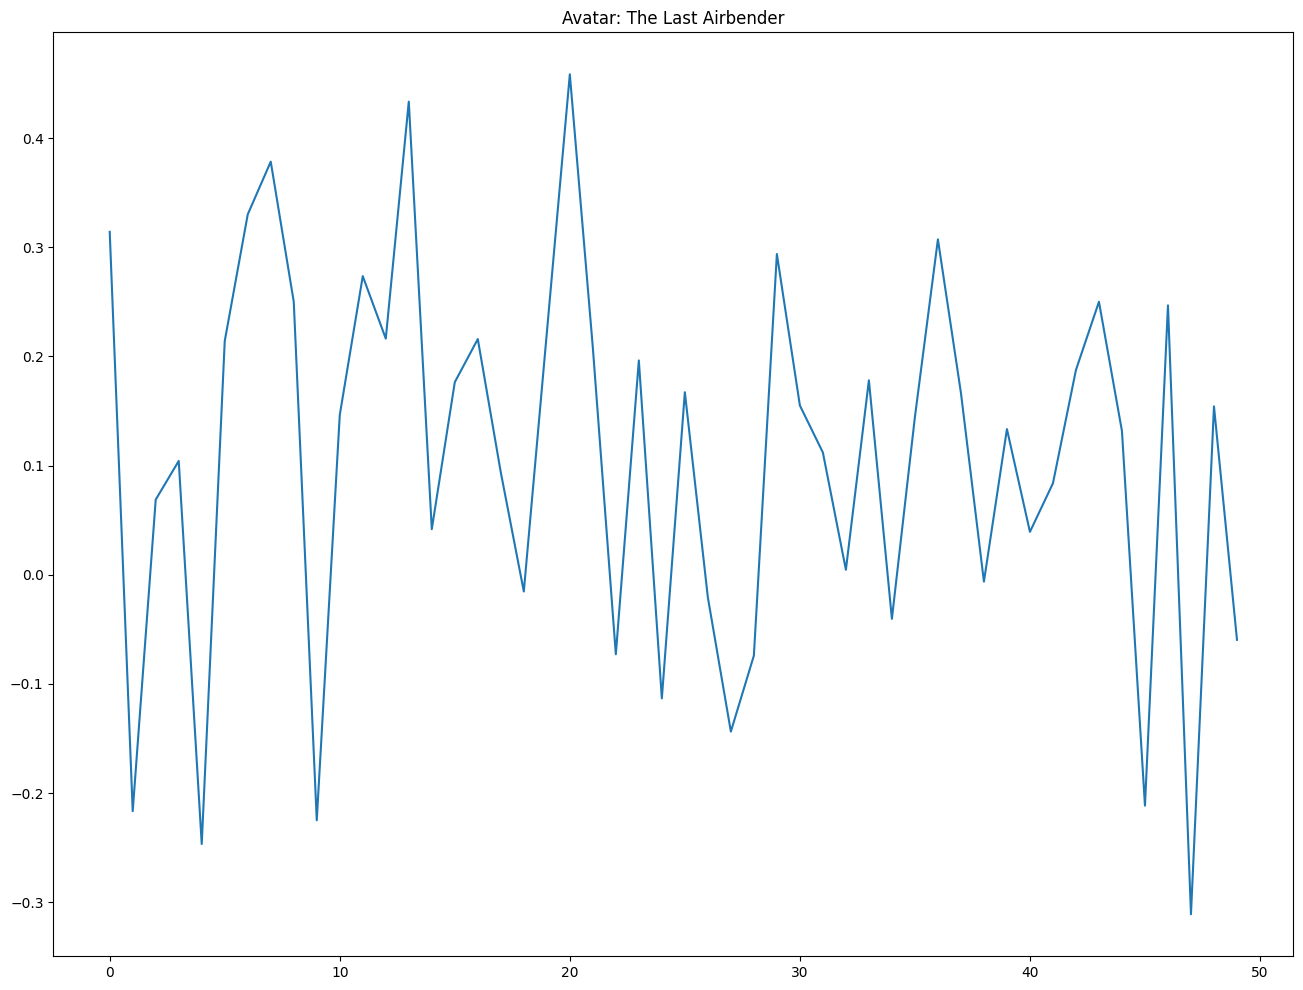

In [20]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

<ipython-input-31-b3f9722ffac0>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index], fontsize=7)


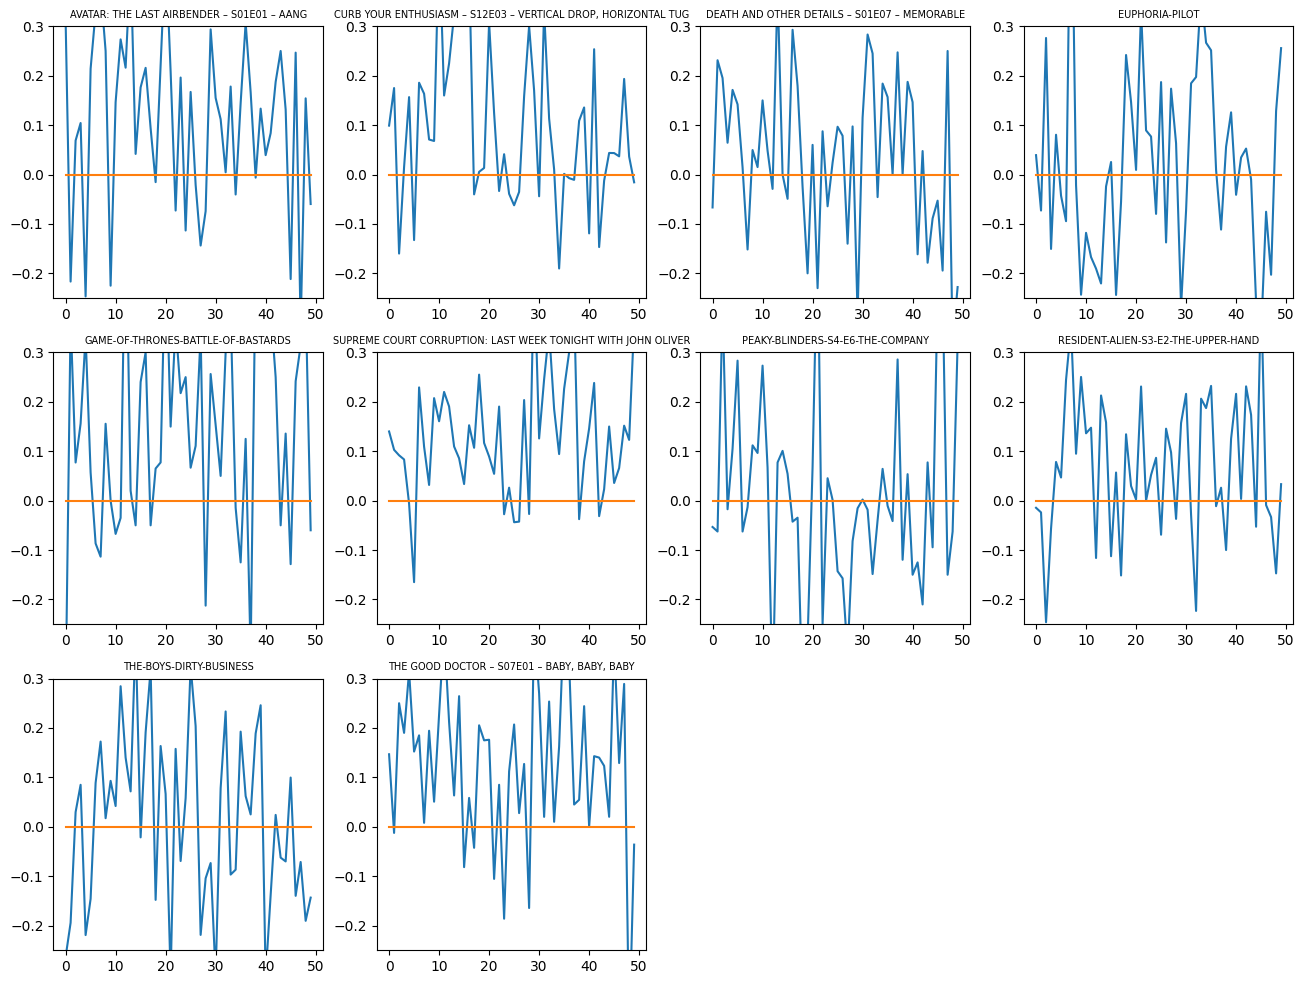

In [31]:
# # Show the plot for all TV Shows

plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    try:
        plt.subplot(3, 4, index+1)
        plt.plot(polarity_transcript[index])
        plt.plot(np.arange(0,50), np.zeros(50))
        plt.title(data['full_name'][index], fontsize=7)
        plt.ylim(ymin=-.25, ymax=.3)
    except Exception as e:
        print(f"Error plotting for comedian {data['full_name'][index]}: {e}")

plt.show()




In [33]:
import pprint

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# Calculate polarity and subjectivity for each comedian's routine
polarity_transcript_new = []
subjectivity_transcript_new = []

for pieces in list_pieces:
    polarities = [pol(piece) for piece in pieces]
    subjectivities = [sub(piece) for piece in pieces]
    polarity_transcript_new.append(polarities)
    subjectivity_transcript_new.append(subjectivities)

# Calculate average polarity and subjectivity for each comedian
avg_polarity = [np.mean(polarities) for polarities in polarity_transcript_new]
avg_subjectivity = [np.mean(subjectivities) for subjectivities in subjectivity_transcript_new]

# Classify comedians based on average polarity
new_polarity_class = ['positive' if polarity > 0.06 else ('negative' if polarity < 0.02 else 'neutral') for polarity in avg_polarity]

# Classify comedians based on average subjectivity
new_subjectivity_class = ['subjective' if subjectivity > 0.51 else 'objective' for subjectivity in avg_subjectivity]

# Update the DataFrame with polarity and subjectivity classifications
data['avg_polarity'] = avg_polarity
data['avg_subjectivity'] = avg_subjectivity

data['new_polarity_class'] = new_polarity_class
data['new_subjectivity_class'] = new_subjectivity_class

data



,transcript,full_name,polarity,subjectivity,polarity_class,subjectivity_class,avg_polarity,avg_subjectivity,new_polarity_class,new_subjectivity_class
Avatar: The Last Airbender,\r\n\r\n\r\n \t\t\t[mysteri...,AVATAR: THE LAST AIRBENDER – S01E01 – AANG,0.129218,0.562664,positive,subjective,0.106738,0.574540,positive,subjective
Curb Your Enthusiasm,\r\n\r\n\r\n \t\t\t- That's...,"CURB YOUR ENTHUSIASM – S12E03 – VERTICAL DROP,...",0.104101,0.567524,positive,subjective,0.094788,0.557847,positive,subjective
Death and Other Details,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,DEATH AND OTHER DETAILS – S01E07 – MEMORABLE,0.030105,0.525050,neutral,subjective,0.034151,0.505295,neutral,objective
Euphoria,\r\n\r\n\r\n \t\t\t1 - (HEA...,EUPHORIA-PILOT,0.018116,0.576698,neutral,subjective,0.022901,0.566564,neutral,subjective
Game Of Thrones,\r\n\r\n\r\n \t\t\tA girl w...,GAME-OF-THRONES-BATTLE-OF-BASTARDS,0.144227,0.531924,positive,subjective,0.148309,0.549377,positive,subjective
Last Week Tonight with John Oliver,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,SUPREME COURT CORRUPTION: LAST WEEK TONIGHT WI...,0.125785,0.493299,positive,objective,0.127582,0.495678,positive,objective
Peaky Blinders,\r\n\r\n\r\n \t\t\tI just g...,PEAKY-BLINDERS-S4-E6-THE-COMPANY,-0.011577,0.482038,negative,objective,0.007816,0.477389,negative,objective
Resident Alien,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,RESIDENT-ALIEN-S3-E2-THE-UPPER-HAND,0.062396,0.550894,positive,subjective,0.067151,0.559416,positive,subjective
The Boys,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,THE-BOYS-DIRTY-BUSINESS,0.006105,0.540722,neutral,subjective,0.013531,0.541442,negative,subjective
The Good Doctor,\r\n\r\n\r\n \t\t\t﻿1\n\t\t...,"THE GOOD DOCTOR – S07E01 – BABY, BABY, BABY",0.137060,0.509928,positive,subjective,0.124548,0.497706,positive,objective
